In [98]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path
 

class Kmeans:
    def __init__(self,k_clusters, max_iter):
        self.k_clusters = k_clusters
        self.max_iter = max_iter

    #Khởi tạo centroids giá trị ngẫu nhiên 
    def InitCentroids(self,img):
        m,n = img.shape
        centriod = np.zeros((self.k_clusters,n))
        for i in range(self.k_clusters):
            centriod[i] = img[np.random.randint(0,m+1),:]
        return centriod   
    
    # Hàm trả về index khoảng cách gần nhất từ centriods
    def Idx_pixels(self,img,centriods):
        m,n = img.shape
        l = len(centriods)
        idx =  np.zeros((m,1))
        for i in range(m):
            D = np.zeros((1,self.k_clusters))
            #Với mỗi pixel, lấy khoảng cách tối thiểu (khoảng cách Euclide) và gắn index pixel đó
            for j in range(l):
                 D[:,j] = np.sqrt(np.sum(np.power((img[i,:]-centriods[j,:]),2)))#tính toán khoảng cách
            # return index of the closest center
            idx[i] = np.argmin(D) + 1 
        return idx

    #Cập nhật lại vị trí của các centroids
    def UpdateCentroids(self,img,idx):
        m,n = img.shape
        centroids = np.zeros((self.k_clusters,n))
        count = np.zeros((self.k_clusters,1))
        # Tính toán centroid mới bằng cách sử dụng giá trị trung bình trên các hàng với mỗi cụm
        for i in range(m):
            index = int(idx[i]-1)
            centroids[index,:] += img[i,:]
            count[index]+=1
        return centroids/count

    def RunKmeans(self,img,centroid,max_iter):
        idx = self.Idx_pixels(img,centroid)
        # Run K-means
        for i in range(max_iter):
            # Tính toán lại centroids and idx dựa vào clusters hiện t
            centroid =  self.UpdateCentroids(img,idx)
            idx = self.Idx_pixels(img,centroid)
        return centroid,idx

In [99]:
def CompressedImage(img, k_clusters, max_iter):
    kmeans = Kmeans(k_clusters, max_iter)
    #Khởi tạo centroids
    initial_centriod = kmeans.InitCentroids(img)
    # run kmeans
    compressed_Centriod,conpressed_idx = kmeans.RunKmeans(img,initial_centriod,max_iter)
    img_Compressed = img.copy()
    #Trả về chế độ xem của mảng ban đầu 
    for i in range(1,k_clusters+1):
        img_Compressed[(conpressed_idx == i).ravel(),:] = compressed_Centriod[i-1]
    return img_Compressed

def Input():
    s = input("import your image file: ")
    r = os.path.exists(s)
    while True:
        if r == True:
            break
        s = input('File does not exist! Please re-enter:')
        r = os.path.exists(s)
    img = mpimg.imread(s)
    imgplot = plt.imshow(img)
    plt.show()
    
    max_iter = int(input("import max iterator: "))
    while max_iter < 0:
        if max_iter > 0:
            break
        max_iter = int(input('Max iterator must be greater than 0! Please re-enter:'))
    
    k_clusters = int(input("import k_clusters: "))
    while k_clusters < 0:
        if k_clusters > 0:
            break
        k_clusters = int(input('k must be greater than 0! Please re-enter:'))
    return img, max_iter, k_clusters



In [100]:
def main():
    A, max_iter, k_clusters = Input()
    img = (A/255).reshape(A.shape[0]*A.shape[1],3)
    img_Compressed = CompressedImage(img,k_clusters,max_iter)
    img_Compressed = img_Compressed.reshape(A.shape[0],A.shape[1],3)
    plt.imshow(img_Compressed)
    
    print("Choice 1. If you want to save as png format")
    print("Choice 2. If you want to save as pdf format")
    print("Choice 3. If you don't want to save")
    choice = int(input("Enter your choice: "))
    while (True):
        if choice == 1:
            temp = input("Enter the name of the file you want to save: ")
            plt.imsave(temp +'.png',img_Compressed )
            print("save successfully")
            break
        if choice == 2:
            temp = input("Enter the name of the file you want to save: ")
            plt.imsave(temp +'.pdf',img_Compressed )
            print("save successfully")
            break
        if choice == 3:
            break
        print("1. If you want to save as png format")
        print("2. If you want to save as pdf format")
        print("3. If you don't want to save")
        choice = int(input("Syntax error! Please re-enter: "))
        
    print("successful conversion!")

import your image file: test.jpg


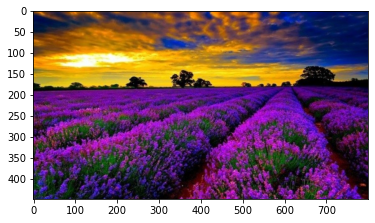

import max iterator: 50
import k_clusters: 3
Choice 1. If you want to save as png format
Choice 2. If you want to save as pdf format
Choice 3. If you don't want to save
Enter your choice: 1
Enter the name of the file you want to save: test1
save successfully
successful conversion!


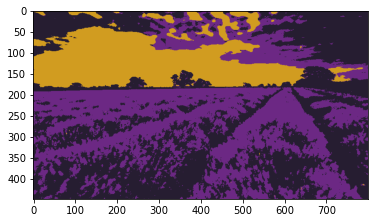

In [101]:
if __name__ == '__main__':
    main()
    
    